<a href="https://colab.research.google.com/github/aytnihca/Sentiment_Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from textblob import TextBlob
from collections import Counter
import warnings

In [ ]:
df_train = pd.read_csv('drugsComTrain_raw.csv')
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
df_train.isnull().sum()
df_train = df_train.dropna()
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
top_10_conditions = ['ADHD', 'Birth Control', 'Depression', 'Bipolar Disorde', 'Obesity', 'Insomnia', 'Acne', 'Anxiety', 'Pain', 'Weight Loss']

In [ ]:
df_train = df_train[df_train['condition'].isin(top_10_conditions)]
df_train = df_train.head(10000)
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
...,...,...,...,...,...,...,...
21763,42838,Xulane,Birth Control,"""This is the first review I&#039;ve ever wrote...",1,15-Sep-16,12
21773,128992,Levonorgestrel,Birth Control,"""I got Skylah and it was horribly painful. Wor...",9,30-Nov-15,2
21774,98694,Nexplanon,Birth Control,"""I have had the Nexplanon in for 9 months . Ge...",7,22-Dec-13,4
21775,8160,Zolpidem,Insomnia,"""After getting it and reading on the Internet ...",10,19-Nov-16,72


In [ ]:
df_train_subset = df_train.sample(n=3000, random_state=1)

In [ ]:
#Using the `drop()` method to remove the old index column after resetting the index
df_train_subset = df_train_subset.reset_index().drop('index', axis=1)

In [ ]:
lst = df_train_subset['review'].tolist()
matched_list = [ele for ele in lst if '&#039' in ele]
print('number of rows with "&#039" character: ', len(matched_list))

number of rows with "&#039" character:  2071


In [ ]:
#converting the junk keyword
df_train_subset['review'] = pd.Series(df_train_subset['review']).replace('&#039;', "'", regex=True)

In [ ]:
contractions_mapping  = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
contractions_pattern = re.compile('(%s)' % '|'.join(contractions_mapping.keys()))

def expand_contractions_func(text, contractions_map=contractions_mapping):
    def replace_contractions(match):
        return contractions_map[match.group(0)]

    return contractions_pattern.sub(replace_contractions, text)

df_train_subset['cleaned_review'] = df_train_subset['review'].apply(expand_contractions_func)

In [ ]:
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import spacy
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
exclude_list = ['but', 'no', 'because', 'against', 'not', 'than']
stop_words = set(stopwords.words('english'))
stop_words.difference_update(exclude_list)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
count = 0
def normalize_punc_lemmatize(text):
    global count
    count = count + 1
    #normalizing the text by lowering to same case
    text = text.lower()
    #removing the punctuations
    text_p = "".join([char for char in text if char not in string.punctuation])
    #lemmatizing the text
    doc = nlp(text_p)
    sen = " ".join([token.lemma_ if token.lemma_ != '-PRON-' else str(token) for token in doc])
    #print(count)
    return sen

df_train_subset['cleaned_review'] = df_train_subset['cleaned_review'].apply(normalize_punc_lemmatize)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import torch
from torch.nn.functional import softmax
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move the model to the GPU
model.to(device)

def sentiment_analysis(text, tokenizer, model):
    MAX_LEN = 512
    inputs = tokenizer(text, return_tensors="pt", max_length=MAX_LEN, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move inputs to the GPU
    outputs = model(**inputs)
    logits = outputs.logits
    probs = softmax(logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()

    return predicted_class, probs.cpu().detach().numpy()

def process_batch(data, batch_size):
    batch_start = 0
    batch_end = batch_size
    sentiments = []

    for _ in tqdm(range(0, len(data), batch_size)):
        batch_data = data.iloc[batch_start:batch_end]
        batch_sentiments = batch_data.apply(lambda x: sentiment_analysis(x, tokenizer, model))
        sentiments.extend(batch_sentiments)

        batch_start += batch_size
        batch_end += batch_size

    return sentiments

batch_size = 50
df_train_subset['sentiment'] = process_batch(df_train_subset['cleaned_review'], batch_size)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

100%|██████████| 60/60 [10:07<00:00, 10.12s/it]


In [ ]:
df_train_subset

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review,sentiment
0,140875,Escitalopram,Bipolar Disorde,"""My experience with lexapro has been a very ro...",4,18-May-16,6,my experience with lexapro have be a very rock...,"(0, [[0.9965958, 0.0034041828]])"
1,123331,Apri,Birth Control,"""This is the worst birth control experience I'...",1,7-Mar-12,1,this be the bad birth control experience I hav...,"(0, [[0.9915165, 0.0084835505]])"
2,82210,Liraglutide,Obesity,"""I haven't been using this very long, but I am...",10,28-Mar-16,32,I have not be use this very long but I be alre...,"(0, [[0.99712604, 0.0028739008]])"
3,96865,Diphenhydramine / naproxen,Insomnia,"""I have a newborn baby and have been having is...",8,31-Dec-16,3,I have a newborn baby and have be have issue w...,"(0, [[0.95142764, 0.048572324]])"
4,107941,Ethinyl estradiol / norelgestromin,Birth Control,"""I did a review on Xulane 8 months ago. I was ...",7,21-Nov-16,8,I do a review on xulane 8 month ago I be take ...,"(0, [[0.9340115, 0.06598851]])"
...,...,...,...,...,...,...,...,...,...
2995,128191,Phentermine,Weight Loss,"""OK, this is actually my 2nd time taking Phent...",10,29-Mar-16,59,ok this be actually my 2nd time take phentermi...,"(1, [[0.10613311, 0.89386684]])"
2996,17623,Ethinyl estradiol / etonogestrel,Birth Control,"""Finishing up my first month with the Nuva rin...",10,21-Mar-16,9,finish up my first month with the nuva ring ma...,"(1, [[0.017017983, 0.982982]])"
2997,176448,Lorazepam,Anxiety,"""Severe social anxiety to the point of not bei...",9,14-Jan-14,31,severe social anxiety to the point of not be a...,"(1, [[0.035284944, 0.964715]])"
2998,133196,Tri-Sprintec,Acne,"""I'm 16 and this is the first birth control I'...",9,21-Apr-13,11,I be 16 and this be the first birth control I ...,"(0, [[0.99676406, 0.0032358787]])"


In [ ]:
df_train_subset['senti'] = df_train_subset.apply(lambda row: row['sentiment'][0], axis=1)
df_train_subset['prob_yes'] = df_train_subset.apply(lambda row: row['sentiment'][1][0][0], axis=1)
df_train_subset['prob_no'] = df_train_subset.apply(lambda row: row['sentiment'][1][0][1], axis=1)
df_train_subset.drop('sentiment', axis=1, inplace=True)

In [ ]:
df_train_subset

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review,senti,prob_yes,prob_no
0,140875,Escitalopram,Bipolar Disorde,"""My experience with lexapro has been a very ro...",4,18-May-16,6,my experience with lexapro have be a very rock...,0,0.996596,0.003404
1,123331,Apri,Birth Control,"""This is the worst birth control experience I'...",1,7-Mar-12,1,this be the bad birth control experience I hav...,0,0.991516,0.008484
2,82210,Liraglutide,Obesity,"""I haven't been using this very long, but I am...",10,28-Mar-16,32,I have not be use this very long but I be alre...,0,0.997126,0.002874
3,96865,Diphenhydramine / naproxen,Insomnia,"""I have a newborn baby and have been having is...",8,31-Dec-16,3,I have a newborn baby and have be have issue w...,0,0.951428,0.048572
4,107941,Ethinyl estradiol / norelgestromin,Birth Control,"""I did a review on Xulane 8 months ago. I was ...",7,21-Nov-16,8,I do a review on xulane 8 month ago I be take ...,0,0.934012,0.065989
...,...,...,...,...,...,...,...,...,...,...,...
2995,128191,Phentermine,Weight Loss,"""OK, this is actually my 2nd time taking Phent...",10,29-Mar-16,59,ok this be actually my 2nd time take phentermi...,1,0.106133,0.893867
2996,17623,Ethinyl estradiol / etonogestrel,Birth Control,"""Finishing up my first month with the Nuva rin...",10,21-Mar-16,9,finish up my first month with the nuva ring ma...,1,0.017018,0.982982
2997,176448,Lorazepam,Anxiety,"""Severe social anxiety to the point of not bei...",9,14-Jan-14,31,severe social anxiety to the point of not be a...,1,0.035285,0.964715
2998,133196,Tri-Sprintec,Acne,"""I'm 16 and this is the first birth control I'...",9,21-Apr-13,11,I be 16 and this be the first birth control I ...,0,0.996764,0.003236


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Identify categorical and numerical columns
#categorical_columns = df_train_subset.select_dtypes(include=['object', 'category']).columns
categorical_columns = ['drugName', 'condition', 'date', 'review', 'cleaned_review']
numerical_columns = ['uniqueID', 'rating', 'usefulCount', 'senti', 'prob_yes', 'prob_no']
# Preprocessing steps for categorical and numerical columns
categorical_preprocessor = Pipeline(steps=[('label_encoder', OneHotEncoder(handle_unknown='ignore'))])
numerical_preprocessor = Pipeline(steps=[('standard_scaler', StandardScaler())])

# Column transformer to apply preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_columns),
        ('num', numerical_preprocessor, numerical_columns)
    ])

# Transform your dataset
data_preprocessed = preprocessor.fit_transform(df_train_subset)

y = df_train_subset['senti']
X = df_train_subset.drop(columns = ['senti'])

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, y, test_size=0.2, random_state=42)

X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.57067844,
         0.43489745, -0.43489732],
       [ 0.        ,  0.        ,  0.        , ..., -0.57067844,
         0.58528471, -0.58528461],
       [ 0.        ,  0.        ,  0.        , ..., -0.57067844,
         0.65335529, -0.65335515],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.57067844,
         0.63315882, -0.63315881],
       [ 1.        ,  0.        ,  0.        , ...,  1.75230029,
        -1.76463326,  1.76463314],
       [ 0.        ,  0.        ,  0.        , ...,  1.75230029,
        -0.99055936,  0.99055936]])

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,8119,8120,8121,8122,8123,8124,8125,8126,8127,8128
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.533140,-0.271446,-0.401554,-0.570678,0.434897,-0.434897
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.371041,0.966150,0.566841,-0.570678,0.585285,-0.585285
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.765962,0.966150,1.246778,-0.570678,0.653355,-0.653355
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.945443,0.966150,0.092945,1.752300,-1.833855,1.833855
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.793016,0.966150,0.731674,1.752300,-1.479590,1.479590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.285375,0.966150,-0.195513,-0.570678,0.627934,-0.627934
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.311562,0.966150,-0.525179,-0.570678,0.596728,-0.596728
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.302257,-1.818442,-0.422159,-0.570678,0.633159,-0.633159
2398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.294436,0.966150,3.101152,1.752300,-1.764633,1.764633


In [ ]:
y_test.value_counts()

senti
0    454
1    146
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression accuracy: {lr_accuracy:.2f}")

Logistic Regression accuracy: 1.00


In [ ]:
np.unique(lr_predictions, return_counts=True)

(array([0, 1]), array([454, 146]))

In [ ]:
y_test.value_counts()

senti
0    454
1    146
Name: count, dtype: int64

In [ ]:
# Random Forest
# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(X_train, y_train)
# rf_predictions = rf.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_predictions)
# print(f"Random Forest accuracy: {rf_accuracy:.2f}")
# Train the Random Forest classifier with reduced parameters
rf = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predict and calculate accuracy
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest accuracy with reduced parameters: {rf_accuracy:.2f}")

Random Forest accuracy with reduced parameters: 0.76


In [ ]:
# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Support Vector Machines accuracy: {svm_accuracy:.2f}")

Support Vector Machines accuracy: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(set(y_train)), activation='softmax')  # Number of unique classes in y_train
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()]
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/10
60/60 [==============================] - 5s 47ms/step - loss: 0.2168 - sparse_categorical_accuracy: 0.9724 - val_loss: 0.0057 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/10
60/60 [==============================] - 2s 26ms/step - loss: 0.0024 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0018 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/10
60/60 [==============================] - 1s 15ms/step - loss: 7.5651e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 3.5230e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 8.7232e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 2.4740e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.0943e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
60/60 [==============================] - 1s 14ms/step - loss: 1.5769e-04 -

In [ ]:
# Reshape input data to have a single channel (required for Conv1D layer)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the neural network architecture
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(len(set(y_train)), activation='softmax')  # Number of unique classes in y_train
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()]
)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model on the test set
test_loss1, test_acc1 = model.evaluate(X_test_reshaped, y_test)

print('Test accuracy:', test_acc1)

Epoch 1/10
60/60 [==============================] - 35s 550ms/step - loss: 0.5681 - sparse_categorical_accuracy: 0.7422 - val_loss: 0.5335 - val_sparse_categorical_accuracy: 0.7625
Epoch 2/10
60/60 [==============================] - 28s 467ms/step - loss: 0.4547 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.5633 - val_sparse_categorical_accuracy: 0.7354
Epoch 3/10
60/60 [==============================] - 38s 639ms/step - loss: 0.3116 - sparse_categorical_accuracy: 0.8583 - val_loss: 0.7007 - val_sparse_categorical_accuracy: 0.7167
Epoch 4/10
60/60 [==============================] - 25s 403ms/step - loss: 0.2047 - sparse_categorical_accuracy: 0.9187 - val_loss: 0.8902 - val_sparse_categorical_accuracy: 0.6917
Epoch 5/10
60/60 [==============================] - 25s 416ms/step - loss: 0.1139 - sparse_categorical_accuracy: 0.9641 - val_loss: 1.1604 - val_sparse_categorical_accuracy: 0.6938
Epoch 6/10
60/60 [==============================] - 27s 453ms/step - loss: 0.0550 - sparse_cate

In [ ]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
clf = LGBMClassifier(
    n_estimators = 10000,
    learning_rate = 1,
    num_leaves = 200,
    subsample =.9,
    max_depth =7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight = 2,
    silent =-1,
    verbose=-1,
    num_iterations=3000
)
model = clf.fit(X_train, y_train) #Model predictions for the light gv

#Predictions
predictions_ml = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions_ml), '\n')
print("Confusion matrix: \n")
print(confusion_matrix(y_test, predictions_ml), '\n')

print(classification_report(y_test, predictions_ml))

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Accuracy:  1.0 

Confusion matrix: 

[[454   0]
 [  0 146]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00       146

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



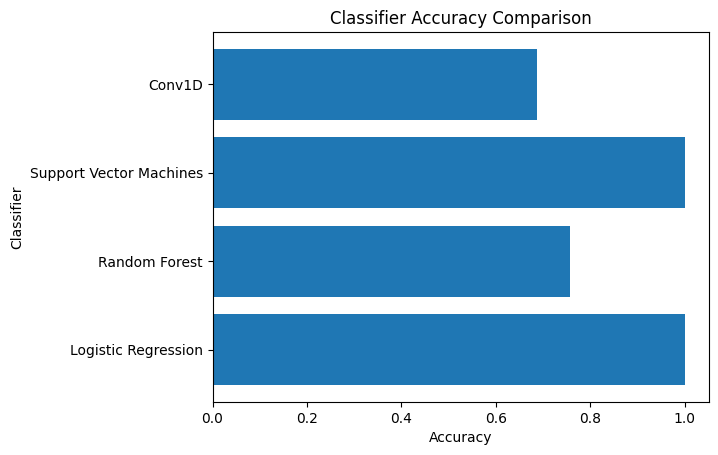

In [ ]:
import matplotlib.pyplot as plt

# Store the classifier names and their accuracies in a list of tuples
classifiers = [
    ('Logistic Regression', lr_accuracy),
    ('Random Forest', rf_accuracy),
    ('Support Vector Machines', svm_accuracy),
    ('Conv1D', test_acc1)
]

# Separate the names and accuracies into two lists
names, accuracies = zip(*classifiers)

# Create a bar chart
fig, ax = plt.subplots()
ax.barh(names, accuracies)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Classifier')
ax.set_title('Classifier Accuracy Comparison')

# Show the chart
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
classifier = RandomForestClassifier()

# Reducing the size of the parameter grid:
# Strategy 1: Limit the Range of Hyperparameters
# Let's narrow down the range for 'max_depth'
param_grid['max_depth'] = [5, 10]

# Strategy 2: Reduce the Number of Hyperparameters
# Let's remove 'min_samples_leaf'
param_grid.pop('min_samples_leaf')

# Strategy 3: Grid Search on a Subset of Parameters
# Let's randomly select combinations for 'n_estimators' and 'min_samples_split'
param_grid['n_estimators'] = np.random.choice([50, 100, 200], size=2, replace=False)
param_grid['min_samples_split'] = np.random.choice([2, 5, 10], size=2, replace=False)

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Train the classifier with the best hyperparameters on the entire training set
best_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(randint(10, 30).rvs(size=3)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,
    random_state=42
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print('Best hyperparameters:', best_params)

# Train the classifier with the best hyperparameters on the entire training set
best_classifier = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 153}
